<div style="text-align: center"> <h1>MIDTERM PRESENTATION</h1></div>

<h3 style='text-align: right;'> Tarun Varma, Bharath Gopal </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/dataset_newsletter.csv")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head()

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


# Data Cleaning

### Checking for null values

In [4]:
df.isna().sum()

Unnamed: 0          0
title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

In [5]:
#Just to check if the null values are giving us any information on the categories:
df.loc[df["title"].isna()]["category"].value_counts(normalize = True)

BREAKING NEWS    0.5
ANNOUNCEMENTS    0.4
PTO              0.1
Name: category, dtype: float64

In [6]:
df.loc[df["signature"].isna()]["category"].value_counts(normalize = True)

ANNOUNCEMENTS        0.3975
UPCOMING EVENTS      0.2325
PTO                  0.2000
BREAKING NEWS        0.1600
VOLUNTEERS NEEDED    0.0075
IMPORTANT NEWS       0.0025
Name: category, dtype: float64

In [7]:
df["category"].value_counts(normalize = True)

ANNOUNCEMENTS        0.522262
BREAKING NEWS        0.186107
UPCOMING EVENTS      0.155812
PTO                  0.076860
IMPORTANT NEWS       0.023053
CLUBS                0.018514
ATHLETICS            0.008670
DONATIONS NEEDED     0.003213
FIELD TRIPS          0.002703
VOLUNTEERS NEEDED    0.001377
ACHIEVEMENTS         0.001275
STUDENT THOUGHTS     0.000153
Name: category, dtype: float64

#### So, we can see that for these 2, the columns being null are somewhat indicative of the category. Thus, we can create a new colum which marks if these are null. And we can replace the nulls with blank strings. However, we will drop the null body's as they are only 3 in value.

In [8]:
df = df.dropna(subset=['body'])

In [9]:
# Create new columns which indicate whether value is null
df['title_null'] = df['title'].isnull().astype(int)
df['signature_null'] = df['signature'].isnull().astype(int)

# Replace nulls with blank strings
df['title'] = df['title'].fillna('')
df['signature'] = df['signature'].fillna('')

In [10]:
df.isna().sum()

Unnamed: 0        0
title             0
body              0
signature         0
submissiontime    0
category          0
title_null        0
signature_null    0
dtype: int64

### Looking at data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19604 entries, 0 to 19606
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      19604 non-null  int64 
 1   title           19604 non-null  object
 2   body            19604 non-null  object
 3   signature       19604 non-null  object
 4   submissiontime  19604 non-null  object
 5   category        19604 non-null  object
 6   title_null      19604 non-null  int32 
 7   signature_null  19604 non-null  int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 1.2+ MB


In [12]:
# We can see that the submission time is an object type. Let us convert this to datetime
df["submissiontime"] = pd.to_datetime(df["submissiontime"])

In [13]:
#Also, we can see that the Unnamed: 0 column is useless, and so we can drop it
df = df.drop("Unnamed: 0", axis =1)

### Looking at the labels

In [14]:
df["category"].value_counts(normalize = True)

ANNOUNCEMENTS        0.522240
BREAKING NEWS        0.186084
UPCOMING EVENTS      0.155836
PTO                  0.076872
IMPORTANT NEWS       0.023057
CLUBS                0.018517
ATHLETICS            0.008672
DONATIONS NEEDED     0.003214
FIELD TRIPS          0.002704
VOLUNTEERS NEEDED    0.001377
ACHIEVEMENTS         0.001275
STUDENT THOUGHTS     0.000153
Name: category, dtype: float64

In [15]:
#As we can see, the bottom 6 categories are all together accounting for hardly 1% of the data.
#So, we can group these together into a new category called 'OTHER'
df['category'] = df['category'].replace(['STUDENT THOUGHTS', 'VOLUNTEERS NEEDED', 'ACHIEVEMENTS', 'FIELD TRIPS', 'DONATIONS NEEDED'], 'OTHER')

In [16]:
df.head()

,title,body,signature,submissiontime,category,title_null,signature_null
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS,0,0
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS,0,0
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS,0,0
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS,0,0
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS,0,0


# Feature Engineering

### Using the hour from Submission time

In [17]:
#Let's create a new column that holds the value of the hour in which a submission was made
df["hour"] = df["submissiontime"].dt.hour

In [18]:
hourly_counts = df.groupby(['category', 'hour']).size().reset_index(name='count')

<AxesSubplot: xlabel='hour', ylabel='count'>

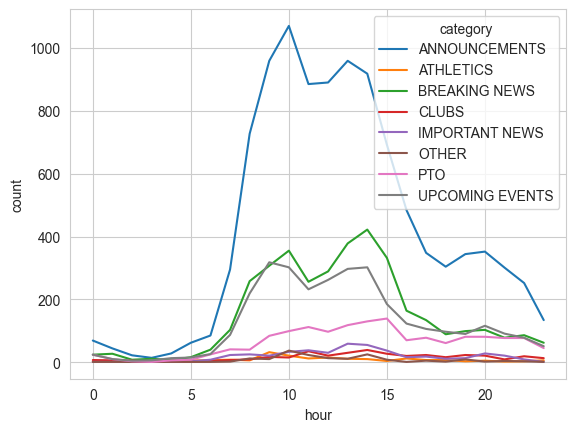

In [19]:
import seaborn as sns
sns.set_style("whitegrid")

# Create the lineplot
sns.lineplot(x="hour", y="count", hue="category", data=hourly_counts)

#### We can see that there is no clear pattern here, and thus using hour is not beneficial

### Contains the word 'PTO'

In [20]:
#Checking if the word 'PTO' exists in the body, title, or signature
def has_pto(text):
    return 1 if 'PTO' in str(text) else 0

In [21]:
# create a new column 'has_pto' with 1 or 0 based on the existence of 'PTO' in 'body' or 'title'
df['has_pto'] = df[['body', 'title', 'signature']].apply(lambda x: has_pto(' '.join(x)), axis=1)

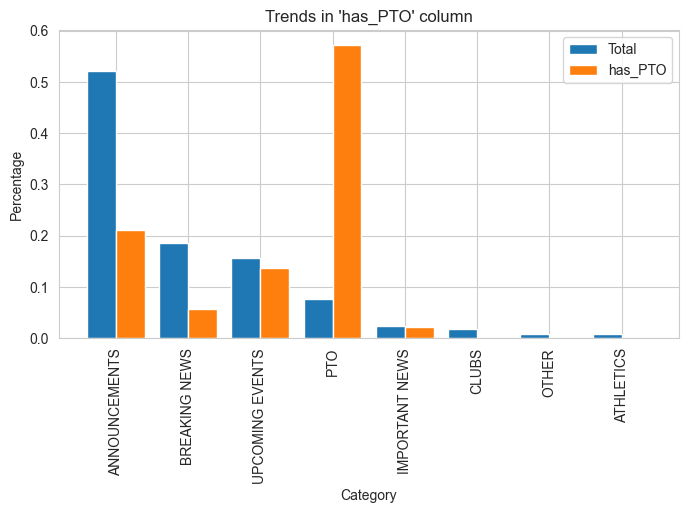

In [22]:
#Now to check whether this data is actually useful
plt.figure(figsize=(8, 4))
ax = df["category"].value_counts(1).index
total_vc = df["category"].value_counts(1).values
y_vc = df.loc[df["has_pto"]==1]["category"].value_counts(normalize = True).reindex(df["category"].value_counts(1).index).values
  
X_axis = np.arange(len(ax))
  
plt.bar(X_axis - 0.2, total_vc, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, y_vc, 0.4, label = 'has_PTO')
plt.xticks(X_axis, ax, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Trends in 'has_PTO' column")
plt.legend()
plt.show()

#### We can see it is showing a high correaltion with the PTO category, and thus could be a good feature to include

### Contains the word 'Club'

In [23]:
#Similar to the above example, we check if the word club exists in body or title
def has_club(text):
    return 1 if 'club' in str(text).lower() else 0

In [24]:
df['has_club'] = df[['body', 'title']].apply(lambda x: has_club(' '.join(x)), axis=1)

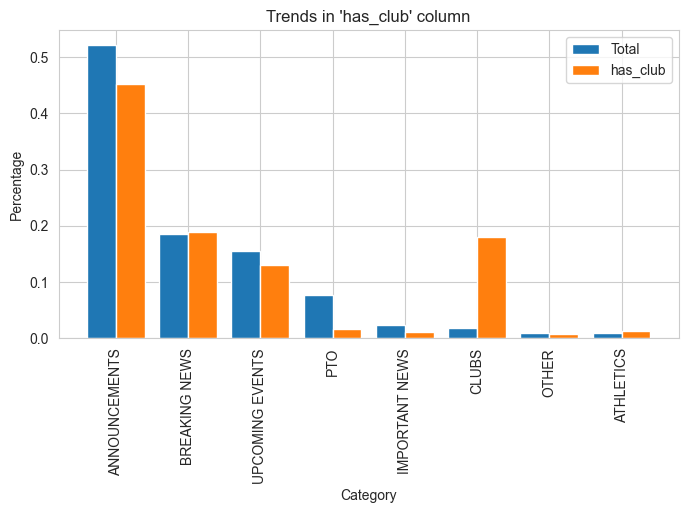

In [25]:
plt.figure(figsize=(8, 4))
ax = df["category"].value_counts(1).index
total_vc = df["category"].value_counts(1).values
y_vc = df.loc[df["has_club"]==1]["category"].value_counts(normalize = True).reindex(df["category"].value_counts(1).index).values
  
X_axis = np.arange(len(ax))
  
plt.bar(X_axis - 0.2, total_vc, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, y_vc, 0.4, label = 'has_club')
plt.xticks(X_axis, ax, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Trends in 'has_club' column")
plt.legend()
plt.show()

#### THis is giving an increased trend for 'Club' category

### Submitted by Principal

In [26]:
#Here, we check if the signature contains the word principal or not
def has_principal(text):
    return 1 if 'principal' in str(text).lower() else 0

In [27]:
df['has_princ'] = df[['signature']].apply(lambda x: has_principal(' '.join(x)), axis=1)

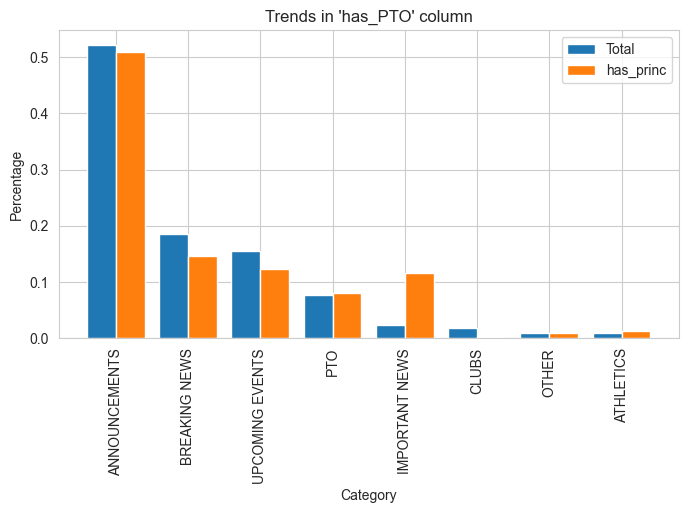

In [28]:
plt.figure(figsize=(8, 4))
ax = df["category"].value_counts(1).index
total_vc = df["category"].value_counts(1).values
y_vc = df.loc[df["has_princ"]==1]["category"].value_counts(normalize = True).reindex(df["category"].value_counts(1).index).values
  
X_axis = np.arange(len(ax))
  
plt.bar(X_axis - 0.2, total_vc, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, y_vc, 0.4, label = 'has_princ')
plt.xticks(X_axis, ax, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Trends in 'has_PTO' column")
plt.legend()
plt.show()

### Using Word Count of the body column

In [29]:
#create a column to store number of words in 'body'
df["body_len"] =  df['body'].apply(lambda x: len(str(x).split()))

In [30]:
word_counts = df.groupby(['category']).median()["body_len"]
word_counts

category
ANNOUNCEMENTS      104.0
ATHLETICS           80.0
BREAKING NEWS      111.0
CLUBS              111.0
IMPORTANT NEWS      69.0
OTHER               70.0
PTO                 78.0
UPCOMING EVENTS     82.0
Name: body_len, dtype: float64

In [31]:
#So a good cutoff here might be to check if the body has less or more than 100 words
df['body_morethan_100'] = df['body_len'].apply(lambda x: 1 if x > 100 else 0)

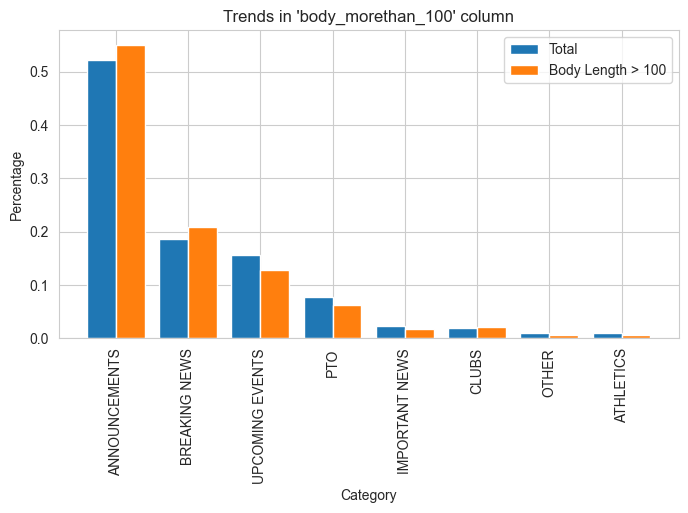

In [32]:
plt.figure(figsize=(8, 4))
ax = df["category"].value_counts(1).index
total_vc = df["category"].value_counts(1).values
y_vc = df.loc[df["body_morethan_100"]==1]["category"].value_counts(1).reindex(df["category"].value_counts(1).index).values
  
X_axis = np.arange(len(ax))
  
plt.bar(X_axis - 0.2, total_vc, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, y_vc, 0.4, label = 'Body Length > 100')
plt.xticks(X_axis, ax, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Trends in 'body_morethan_100' column")
plt.legend()
plt.show()

#### This is not really indicative of any category, and so we wont use this

### If submission was made on weekday or weekend

In [33]:
df['is_weekend'] = (df['submissiontime'].dt.weekday >= 5).astype(int)

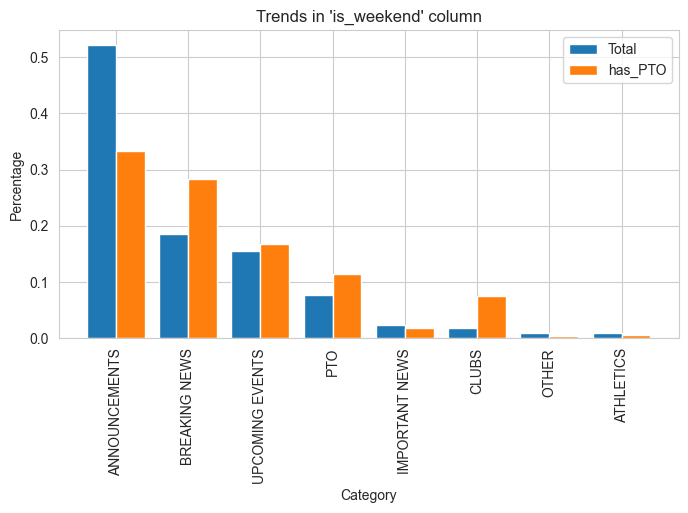

In [34]:
plt.figure(figsize=(8,4))
ax = df["category"].value_counts(1).index
total_vc = df["category"].value_counts(1).values
y_vc = df.loc[df["is_weekend"]==1]["category"].value_counts(normalize = True).reindex(df["category"].value_counts(1).index).values
  
X_axis = np.arange(len(ax))
  
plt.bar(X_axis - 0.2, total_vc, 0.4, label = 'Total')
plt.bar(X_axis + 0.2, y_vc, 0.4, label = 'has_PTO')
plt.xticks(X_axis, ax, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Trends in 'is_weekend' column")
plt.legend()
plt.show()

#### We can observe that if it is on the weekend, it is more likely to be Breaking news, or Clubs related. Could be useful

# Preparing the data to input into model

In [35]:
df.head()

,title,body,signature,submissiontime,category,title_null,signature_null,hour,has_pto,has_club,has_princ,body_len,body_morethan_100,is_weekend
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS,0,0,9,0,0,0,43,0,0
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS,0,0,21,0,0,0,78,0,0
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS,0,0,15,0,0,0,16,0,0
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS,0,0,16,0,0,0,39,0,1
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS,0,0,5,0,0,0,64,0,0


In [36]:
def prep_data(df, num_cols, text_cols, v):
    
    from sklearn.model_selection import train_test_split
    
    X = df.loc[:, text_cols + num_cols]
    y = df["category"]

    X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.1)
    
    X_train_vec = v.fit_transform(X_train[text_cols].apply(lambda x: ' '.join(x), axis=1))
    X_test_vec = v.transform(X_test[text_cols].apply(lambda x: ' '.join(x), axis=1))
    X_val_vec = v.transform(X_val[text_cols].apply(lambda x: ' '.join(x), axis=1))
       
    X_train = pd.concat([pd.DataFrame(X_train[num_cols].reset_index(drop=True)), pd.DataFrame(X_train_vec.toarray()).reset_index(drop=True)], axis=1)
    X_test = pd.concat([pd.DataFrame(X_test[num_cols].reset_index(drop=True)), pd.DataFrame(X_test_vec.toarray()).reset_index(drop=True)], axis=1)
    X_val = pd.concat([pd.DataFrame(X_val[num_cols].reset_index(drop=True)), pd.DataFrame(X_val_vec.toarray()).reset_index(drop=True)], axis=1)
    
    
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    X_val.columns = X_val.columns.astype(str)
    
    
    return X_train, X_test, X_val, y_train, y_test, y_val

In [37]:
#Decide which columns we are using
num_cols = ['has_pto', 'has_princ', 'is_weekend', 'has_club', 'title_null', 'signature_null']
text_cols = ['title', 'body', 'signature']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
v = CountVectorizer()

#Prepare the data to be fit
X_train, X_test, X_val, y_train, y_test, y_val = prep_data(df, num_cols, text_cols, v)

# Fitting models

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
acc = lr.score(X_test, y_test)
print("Accuracy: ", acc)

Accuracy:  0.7347615404233614


In [41]:
from sklearn.metrics import f1_score
y_pred = lr.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.7306681795915935


### Hyper parameter tuning

In [43]:
lr_cg = LogisticRegression(solver='newton-cg')
lr_cg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [44]:
acc = lr_cg.score(X_test, y_test)
print("Accuracy: ", acc)

Accuracy:  0.7503187962254527


In [45]:
y_pred = lr_cg.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.7462771233563281


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
acc = dt.score(X_test, y_test)
print("Accuracy: ", acc)

Accuracy:  0.6885998469778117


In [48]:
y_pred = dt.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.6847475850941243


### Hyper parameter tuning

In [49]:
for max_d in range(150,250, 30):
    dt = DecisionTreeClassifier(max_depth=max_d, random_state= 5)
    dt.fit(X_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), dt.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), dt.score(X_val,y_val))
    print('')

The Training Accuracy for max_depth 150 is: 0.9866090406688395
The Validation Accuracy for max_depth 150 is: 0.6838750796685787

The Training Accuracy for max_depth 180 is: 0.9866090406688395
The Validation Accuracy for max_depth 180 is: 0.6838750796685787

The Training Accuracy for max_depth 210 is: 0.9866090406688395
The Validation Accuracy for max_depth 210 is: 0.6838750796685787

The Training Accuracy for max_depth 240 is: 0.9866090406688395
The Validation Accuracy for max_depth 240 is: 0.6838750796685787



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
acc = rf.score(X_test, y_test)
print("Accuracy: ", acc)

Accuracy:  0.7179290997194593


In [52]:
y_pred = rf.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.6901694725005718


### Hyper parameter tuning

In [53]:
for max_n in range(40,200, 40):
    rf = RandomForestClassifier(n_estimators=max_n, random_state= 5)
    rf.fit(X_train, y_train)
    print('The Training Accuracy for n_estimators {} is:'.format(max_n), rf.score(X_train, y_train))
    print('The Validation Accuracy for n_estimators {} is:'.format(max_n), rf.score(X_val,y_val))
    print('')

The Training Accuracy for n_estimators 40 is: 0.9863256341221482
The Validation Accuracy for n_estimators 40 is: 0.7119184193753983

The Training Accuracy for n_estimators 80 is: 0.9866090406688395
The Validation Accuracy for n_estimators 80 is: 0.7151051625239006

The Training Accuracy for n_estimators 120 is: 0.9866090406688395
The Validation Accuracy for n_estimators 120 is: 0.7170172084130019

The Training Accuracy for n_estimators 160 is: 0.9866090406688395
The Validation Accuracy for n_estimators 160 is: 0.7189292543021033

